# Capstone – MSBA – Fall 2024

## Sarvesh Keluskar u1421372 - Individual Notebook

### **Table of Contents**

1. [Introduction](#Introduction)  
   i. [Business Problem](#Business-Problem)  
   ii. [Analytical Approach](#Analytical-Approach)  
   iii. [Scope of the Project](#Scope-of-the-Project)  
   iv. [Purpose of the Notebook](#Purpose-of-the-Notebook)  

2. [Loading Libraries](#Loading-Libraries)  

3. [Importing Dataset](#Importing-Dataset)  

4. [Data Cleaning](#Data-Cleaning)  

5. [Feature Engineering](#Feature-Engineering)  
   i. [Adding More Informative Columns](#Adding-More-Informative-Columns)  
   ii. [Calculating Frequency of Machine Breakdown](#Calculating-Frequency-of-Machine-Breakdown)  
   iii. [Calculating Risk of Breakdown Based on Frequency](#Calculating-Risk-of-Breakdown-Based-on-Frequency)  
   iv. [Predicting and Filtering Next Maintenance Schedules with Risk and Performance Data Integration](#Predicting-and-Filtering-Next-Maintenance-Schedules-with-Risk-and-Performance-Data-Integration)  
   v. [High-Risk Maintenance Predictions](#High-Risk-Maintenance-Predictions)  
   vi. [Label Encoding](#Label-Encoding)  

6. [Modeling](#Modeling)   
   i.[Model 2: Decision Tree](#Model-2-Decision-Tree)  
   ii. [Model 3: Survival Analysis](#Model-3-Survival-Analysis)
   
   
 7. [Cost Benefit Analysis](#Cost-Benefit-Analysis)

### 1. Introduction

This project aims to develop a predictive maintenance model for Swire Coca-Cola to reduce unplanned machine downtimes and improve production efficiency. By analyzing historical downtime data from the IWC system, the model will predict when machines are likely to fail, enabling proactive maintenance scheduling and reducing costly disruptions. The goal is to help Swire Coca-Cola optimize its production capacity, minimize financial losses due to downtime, and better manage spare parts inventory, ultimately improving overall operational performance across its six production plants.

#### i. Business Problem

The business problem centers around improving machine reliability and reducing unplanned downtimes, which lead to significant operational inefficiencies and financial losses. By identifying the factors contributing to unplanned maintenance events and comparing them to planned maintenance activities, the organization can enhance its maintenance scheduling and inventory management.

#### ii. Analytics Approach

From an analytical perspective, this project aims to:

1.Quantify the distribution of planned and unplanned maintenance activities across different production locations.
   
2.Explore the relationship between various maintenance attributes, such as maintenance type, location, and frequency, to better understand the factors leading to equipment breakdowns.


#### iii. Scope of the Project

This project aims to develop a predictive maintenance model for Swire Coca-Cola by analyzing machine downtime data to reduce unplanned breakdowns and optimize maintenance schedules. By identifying patterns in historical downtime records and forecasting future breakdowns, the model will help improve production efficiency, reduce costs, and provide actionable insights for maintenance planning. It will also guide spare parts stocking and optimize production guardrails. A user-friendly dashboard will be delivered to help plant supervisors proactively manage maintenance, minimizing downtime and enhancing overall productivity.

#### iv. Purpose of the Notebook 

The notebook's purpose is to:

•   Analyze historical downtime data to identify patterns and factors contributing to machine breakdowns.

•	Develop predictive models (time series, decision trees, and survival analysis) to forecast machine failures.

•	Evaluate and compare model performance using metrics such as MAE, RMSE, R², and concordance index (C-index).

•	Provide actionable insights, including maintenance schedules and spare part inventory recommendations.


### 2. Loading Libraries

In [1]:
# Loading Libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson


from statsmodels.tsa.seasonal import STL
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')



D:\Big Data and Data Science\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 3. Importing Dataset

In [2]:
# Set the directory
os.chdir(r"D:\Swire Coca Cola Project")

# Verify the change
print("Current Working Directory:", os.getcwd())

# Importing Dataset.
iwc_df = pd.read_csv('IWC_Work_Orders_Extract.csv', low_memory=False) # Initial Dataset. 

Current Working Directory: D:\Swire Coca Cola Project


### 4. Data Cleaning 

In [3]:
print(iwc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

In [4]:
# Viewing General Statistics of the Raw Dataset.
print(iwc_df.describe())

           ORDER_ID  ACTUAL_WORK_IN_MINUTES  MAINTENANCE_ITEM  EQUIPMENT_ID
count  1.427264e+06            1.427264e+06     152594.000000  2.917950e+05
mean   4.561470e+10            8.862968e+01     115846.807954  3.002609e+08
std    8.387114e+10            8.037915e+02      71325.255687  5.581645e+06
min    1.000219e+08            0.000000e+00      39801.000000  2.000871e+08
25%    4.022602e+08            1.200000e+01      41046.000000  3.000092e+08
50%    7.044271e+08            4.800000e+01     112995.000000  3.000178e+08
75%    1.002343e+09            9.000000e+01     134702.000000  3.000269e+08
max    9.000001e+11            3.301848e+05     346352.000000  4.000290e+08


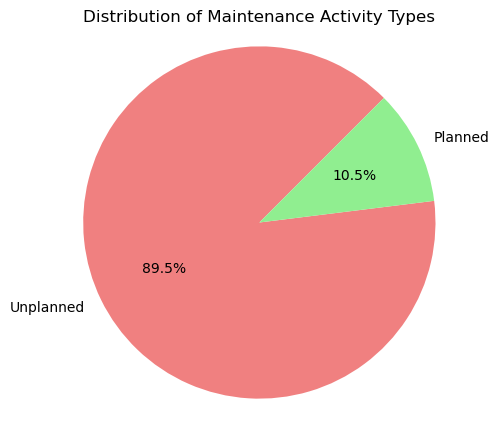

In [5]:
# Counting occurrences of each maintenance activity type
maintenance_activity_counts = iwc_df['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Defining custom colors for planned and unplanned maintenance types
colors = ['lightcoral', 'lightgreen']  # lightgreen for planned, lightcoral for unplanned

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(maintenance_activity_counts, labels=maintenance_activity_counts.index, autopct='%1.1f%%', startangle=45, colors=colors)
plt.title('Distribution of Maintenance Activity Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


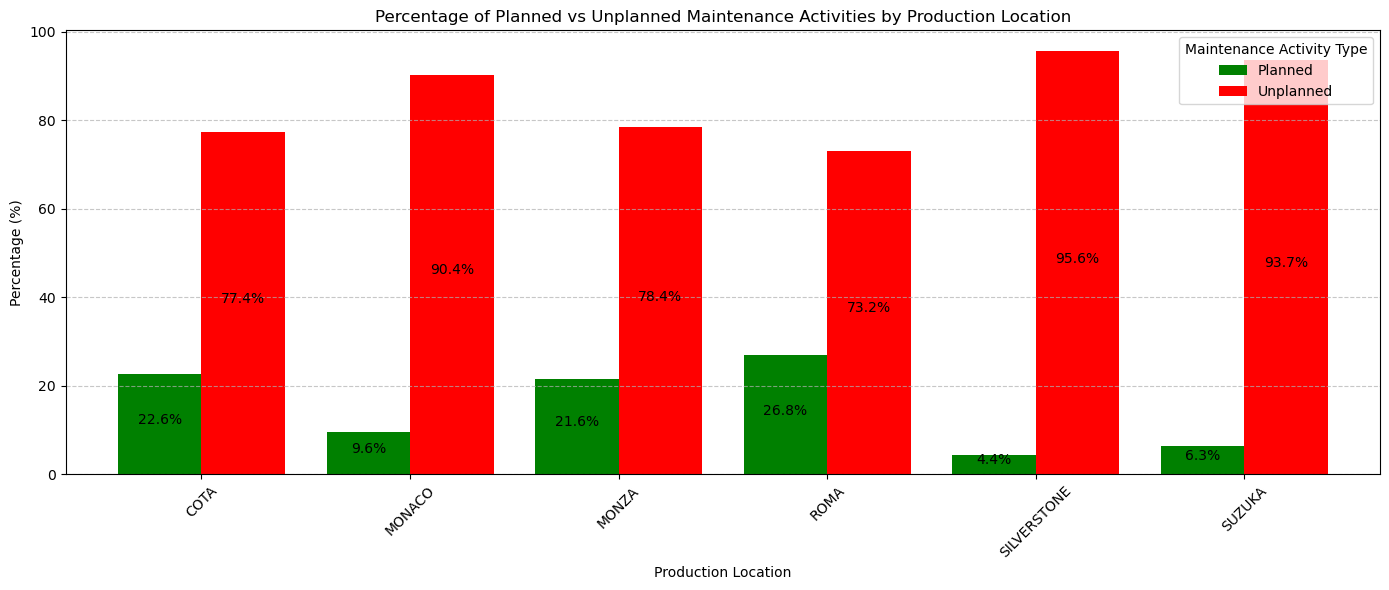

In [6]:
# Group the data by Production Location and Maintenance Activity Type, then count the occurrences
grouped_data = iwc_df.groupby(['PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE']).size().reset_index(name='Count')

# Calculate the total counts for each production location
total_counts = grouped_data.groupby('PRODUCTION_LOCATION')['Count'].transform('sum')

# Calculate the percentage of each maintenance activity type within each production location
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Pivot the data to create columns for each maintenance activity type with percentages
pivot_data = grouped_data.pivot(index='PRODUCTION_LOCATION', columns='MAINTENANCE_ACTIVITY_TYPE', values='Percentage').fillna(0)

# Define custom colors for the bars
custom_colors = ['green', 'red']

# Plotting the grouped bar plot with custom colors
ax = pivot_data.plot(kind='bar', figsize=(14, 6), color=custom_colors, width=0.8)
plt.title('Percentage of Planned vs Unplanned Maintenance Activities by Production Location')
plt.xlabel('Production Location')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Maintenance Activity Type', loc='upper right')

# Annotate each bar with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


In [7]:
# Calculation of the percentage of missing values in the entire dataset.

missing_values_percentage = (iwc_df.isnull().sum() / len(iwc_df)) * 100
print(missing_values_percentage)

ORDER_ID                            0.000000
PLANT_ID                            0.000000
PRODUCTION_LOCATION                 0.000000
EXECUTION_START_DATE                0.000000
EXECUTION_FINISH_DATE               0.000000
ACTUAL_START_TIME                   0.000000
ACTUAL_FINISH_TIME                  0.000000
ACTUAL_WORK_IN_MINUTES              0.000000
MAINTENANCE_PLAN                   89.308635
MAINTENANCE_ITEM                   89.308635
MAINTENANCE_ACTIVITY_TYPE           0.000000
ORDER_DESCRIPTION                  79.557601
MAINTENANCE_TYPE_DESCRIPTION       79.555639
FUNCTIONAL_LOC                     79.556550
FUNCTIONAL_AREA_NODE_1_MODIFIED    79.673207
FUNCTIONAL_AREA_NODE_2_MODIFIED    80.213401
FUNCTIONAL_AREA_NODE_3_MODIFIED    81.875042
FUNCTIONAL_AREA_NODE_4_MODIFIED    83.354656
FUNCTIONAL_AREA_NODE_5_MODIFIED    99.847260
EQUIPMENT_ID                       79.555639
EQUIPMENT_DESC                     94.433616
EQUIP_CAT_DESC                     94.433616
EQUIP_STAR

In [8]:
# Converting Actual_Work_in_Minutes in to Hour to standardize time unit for comparison.

# 1. Generating a copy of the dataframe
iwc_df_copy = iwc_df.copy()

# 2. Converting 'ACTUAL_WORK_IN_MINUTES' into hours and creating a new column
iwc_df_copy['ACTUAL_WORK_IN_HOURS'] = iwc_df_copy['ACTUAL_WORK_IN_MINUTES'] / 60

# 3. Displaying the first few rows to verify the conversion
iwc_df_copy[['ACTUAL_WORK_IN_MINUTES', 'ACTUAL_WORK_IN_HOURS']].head()

,ACTUAL_WORK_IN_MINUTES,ACTUAL_WORK_IN_HOURS
0,390.0,6.5
1,420.0,7.0
2,30.0,0.5
3,60.0,1.0
4,120.0,2.0


In [9]:
# Counting the various types of Maintainence Type.

iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()

MAINTENANCE_TYPE_DESCRIPTION
Preventive Maintenance Order    151533
Corrective Maintenance Order    134074
Administrative Order              6161
Capital Order                       22
Breakdown Maintenance Order          5
Name: count, dtype: int64

**INTERPRETATION:**

As we observe that there are almost 80% missing values in the variable "Maintenance_Type_Description", we need to impute the missing values with "Breakdown Maintenance Order" as the count of the same is just 5 entries in the total dataset and as per the above graph all are unplanned maintainence activites, hence it is logical to impute all the missing values with "Breakdown Maintenance Order" as we are aiming to reduced the downtime of the machine by forecasting the breaking of the machine accurately.

In [10]:
# Imputation of Missing Values of " Maintenance_Type_Description" (80% Missing Values)

# Checking for missing values in the 'MAINTENANCE_TYPE_DESCRIPTION' column
print(iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].isnull().sum())

# Imputing missing values with 'Breakdown Maintenance Order'
iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].fillna('Breakdown Maintenance Order', inplace=True)

# Verifying the imputation
print(iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].isnull().sum())

1135469
0


In [11]:
# Checking for rows where MAINTENANCE_ACTIVITY_TYPE is 'Unplanned' but 'MAINTENANCE_PLAN' is not null
unplanned_with_plan = iwc_df_copy[(iwc_df_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') & (iwc_df_copy['MAINTENANCE_PLAN'].notnull())]

# Counting such instances distributed over the production location
unplanned_with_plan_by_location = unplanned_with_plan.groupby('PRODUCTION_LOCATION').size()

# Display the result
print(unplanned_with_plan_by_location)

PRODUCTION_LOCATION
COTA              4
MONZA          2118
ROMA             33
SILVERSTONE      49
SUZUKA            3
dtype: int64


In [12]:
# Checking for rows where MAINTENANCE_ACTIVITY_TYPE is 'Unplanned' but 'MAINTENANCE_ITEM' is not null
unplanned_with_item = iwc_df_copy[(iwc_df_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') & (iwc_df_copy['MAINTENANCE_ITEM'].notnull())]

# Counting such instances distributed over the production location
unplanned_with_item_by_location = unplanned_with_item.groupby('PRODUCTION_LOCATION').size()

# Display the result
print(unplanned_with_item_by_location)

PRODUCTION_LOCATION
COTA              4
MONZA          2118
ROMA             33
SILVERSTONE      49
SUZUKA            3
dtype: int64


**INTERPRETATION:**

According to the data dictionary, when the MAINTENANCE_PLAN is null, the event should be categorized as unplanned, and vice versa. However, upon reviewing the data, we identified 2,207 instances where unplanned maintenance events were incorrectly associated with a maintenance plan, distributed across the six production locations. This discrepancy indicates potential inaccuracies in the way work orders are recorded at these production plants. These cases warrant special attention, as they suggest abnormal behavior in what should have been "planned breakdowns." While this variable may not be directly useful for modeling, as the relevant information is already captured in the MAINTENANCE_ACTIVITY_TYPE variable (planned or unplanned), it offers valuable operational insights. Specifically, it highlights the need for more robust preventive measures and accurate recording of work order entries to enhance operational efficiency.

In [13]:
# Checking for rows where MAINTENANCE_ACTIVITY_TYPE is 'Unplanned' but 'MAINTENANCE_ITEM' is not null
unplanned_with_item = iwc_df_copy[(iwc_df_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') & (iwc_df_copy['MAINTENANCE_ITEM'].notnull())]

# Counting such instances distributed over the production location
unplanned_with_item_by_location = unplanned_with_item.groupby('PRODUCTION_LOCATION').size()

# Display the result
print(unplanned_with_item_by_location)

PRODUCTION_LOCATION
COTA              4
MONZA          2118
ROMA             33
SILVERSTONE      49
SUZUKA            3
dtype: int64


**INTREPRETATION:**

A similar situation was observed with the MAINTENANCE_ITEM variable. Although a null value indicates unplanned maintenance, there were instances where unplanned events were associated with a maintenance item. These cases also suggest potential inaccuracies in the data recording process and should be addressed to improve data reliability and operational efficiency.

### 5. Feature Engineering

In [14]:
# Dropping all the rows with "Equipment_ID" as NaN.
cleaned_data = iwc_df_copy.dropna(subset=['EQUIPMENT_ID'])

In [15]:
# Imputing 'FUNCTIONAL_AREA_NODE_1_MODIFIED'


cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].value_counts()
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='MONACO']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'MONACO'),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'MONACO PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='MONZA']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'MONZA') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isna()),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'MONZA PRODUCTION'
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'ROMA') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED']=='PRODUCTION'),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'ROMA PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='SILVERSTONE']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'SILVERSTONE') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isna()),
       'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'SILVERSTONE PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='COTA']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'COTA'),
       'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'COTA PRODUCTION'



In [16]:
# Imputing 'FUNCTIONAL_AREA_NODE_2_MODIFIED'

cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].nunique()
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].value_counts()
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'AIR', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'AIR SYSTEM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CO2', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CO2 SYSTEM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BOTTLE', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BOTTLE LINE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CAN', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'REFRIGERATION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'REFRIGERATION SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BLENDING', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CIP', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CIP SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'WATER', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WATER TREATMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'FACILITIES', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'FACILITIES'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'WAREHOUSE', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WAREHOUSE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'PRODUCTION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'PRODUCTION'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'QUALITY', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'QUALITY ASSURANCE EQUIPMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'SAFETY', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'SAFETY EQUIPMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BTL_PET', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BTL_PET_LINE '
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'RECYCLING', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'RECYCLING'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'PRD LINES', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'PRD LINES'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'STEAM', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'STEAM SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'SANITATION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'SANITATION SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BIB', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BIB LINE'


In [17]:
# Verifying Modified Data
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].nunique()
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].value_counts()

FUNCTIONAL_AREA_NODE_2_MODIFIED
CAN LINE                       103525
BOTTLE LINE                     87885
BTL_PET_LINE                    43989
AIR SYSTEM                       9366
WATER TREATMENT                  6631
BLENDING ROOM                    5274
REFRIGERATION SYSTEMS            4402
COMMON EQUIPMENT                 3069
RECYCLING                        2775
COOLER SERVICE HVAC              2699
CO2 SYSTEM                       2543
STEAM SYSTEMS                    2313
BIB LINE                         1197
OFFICES                           903
HEATING SYSTEMS                   805
PRD LINES                         773
FACILITIES                        711
NITROGEN SYSTEMS                  591
QUALITY ASSURANCE EQUIPMENT       503
SAFETY EQUIPMENT                  460
CIP SYSTEMS                       351
PRODUCTION                        332
SANITATION SYSTEMS                255
NEW PM PLAN                       211
WAREHOUSE                         196
GROUNDS           

In [18]:
# Funtional Plant Location

cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300026806, 'FUNCTIONAL_LOC'] = 'G816-PRD-L15-L03-L130'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300045068, 'FUNCTIONAL_LOC'] = 'G811-PRD-L30-L03-L030'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300001115, 'FUNCTIONAL_LOC'] = 'G291-PRD-L30-L01-L070'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 400002825, 'FUNCTIONAL_LOC'] = 'G261-PRD-P25-XXX'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 400002842, 'FUNCTIONAL_LOC'] = 'G261-PRD-P42-XXX'

In [19]:
# Functional_AREA_NODE_2_MODIFIED


# Group by relevant columns
grouped = cleaned_data.groupby(
    ['EQUIPMENT_ID', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 'FUNCTIONAL_AREA_NODE_1_MODIFIED']
)['FUNCTIONAL_AREA_NODE_2_MODIFIED']

# Fill NaN values within each group using ffill and bfill
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = (grouped.transform(lambda x: x.ffill().bfill()).combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

In [20]:
# FUNCTIONAL_AREA_NODE_2_MODIFIED


condition = (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')
check_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\b(?:check|daily|utility|utilities|meetings|meeting|Line Walk|cleaing)\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'Routine Check' where the condition is met
cleaned_data.loc[check_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'Routine Check'


# Adding specific match for 'lube' and 'oil' using word boundaries
lube_oil_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\b(?:lube|oil)\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'Lubrication' where the condition is met
cleaned_data.loc[lube_oil_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'LUBRICATION'



# Can Line Update
# FUNCTIONAL_AREA_NODE_2_MODIFIED
null_or_blank_condition = cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')

condition = (cleaned_data['ORDER_DESCRIPTION'].str.contains('CAN', case=False, na=False))
a=condition&null_or_blank_condition
cleaned_data.loc[a, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'


condition2 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('CNG', case=False, na=False))

b=condition2&null_or_blank_condition

cleaned_data.loc[b, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'REFRIGERATION SYSTEMS'
condition3 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('Tank', case=False, na=False))

# Additional condition to check for 'COTA' in FUNCTIONAL_AREA_NODE_1_MODIFIED
cota_condition = cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].str.contains('COTA', case=False, na=False)

# Combine both conditions
combined_condition = condition3 & cota_condition & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WATER TREATMENT'
condition4 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('PUMP', case=False, na=False))

# Condition to check if FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank
combined_condition = condition4 & cota_condition & null_or_blank_condition

# Update FUNCTIONAL_AREA_NODE_2_MODIFIED where all conditions are met
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'

condition6 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('SYRUP', case=False, na=False))
combined_condition = condition6  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'
monaco_condition = cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].str.contains('MONACO', case=False, na=False)
condition5 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('DEPALLETIZER', case=False, na=False))


# Condition to check if FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank

# Combine all conditions
combined_condition = condition5 & monaco_condition & null_or_blank_condition

# Update FUNCTIONAL_AREA_NODE_2_MODIFIED where all conditions are met
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'

condition7 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('SILO', case=False, na=False))
combined_condition = condition7  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BTL_PET_LINE'


condition8 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('Bastian', case=False, na=False))
combined_condition = condition8  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'AIR SYSTEM'


# Additional condition for "syrup" and "room" both in the ORDER_DESCRIPTION
syrup_room_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\bsyrup\b', case=False, na=False)) & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\broom\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'BLENDING ROOM' where 'syrup' and 'room' are both in the ORDER_DESCRIPTION
cleaned_data.loc[syrup_room_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'

# Grouping by EQUIPMENT_ID and counting the number of N/A or blank values in FUNCTIONAL_AREA_NODE_2_MODIFIED
na_blank_counts = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]
equipment_na_counts = na_blank_counts.groupby('EQUIPMENT_ID').size().reset_index(name='na_blank_count')

# Sorting the result to find the EQUIPMENT_ID with the most N/A or blank values
equipment_na_counts_sorted = equipment_na_counts.sort_values(by='na_blank_count', ascending=False)

# Displaying the top 5 EQUIPMENT_IDs with the most N/A or blank values
equipment_na_counts_sorted.head()

,EQUIPMENT_ID,na_blank_count
38,300017654.0,1587
131,300224439.0,1202
136,300239802.0,187
46,300026992.0,79
125,300045283.0,68


In [21]:
# Step 1: Find rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is not null or blank, to use for matching
non_null_functional_area = cleaned_data[~(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == ''))]

# Create a mapping of FUNCTIONAL_LOC to FUNCTIONAL_AREA_NODE_2_MODIFIED from non-null rows
functional_loc_map = dict(zip(non_null_functional_area['FUNCTIONAL_LOC'], non_null_functional_area['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

# Step 2: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank and FUNCTIONAL_LOC exists
null_functional_area = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

# Step 3: Check if FUNCTIONAL_LOC exists in the mapping (before filling)
preview_fill = null_functional_area[null_functional_area['FUNCTIONAL_LOC'].isin(functional_loc_map.keys())]

# Step 4: Preview the results before filling
preview_fill[['FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']].head()


# Step 4: Provide unique FUNCTIONAL_LOC and FUNCTIONAL_AREA_NODE_2_MODIFIED pairs before filling
unique_preview_fill = preview_fill[['FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']].drop_duplicates()

# Display unique FUNCTIONAL_LOC and FUNCTIONAL_AREA_NODE_2_MODIFIED pairs
print(unique_preview_fill)


# Step 1: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is N/A or blank
na_or_blank_functional_area = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

# Step 2: Extract ORDER_DESCRIPTION as a list of sentences from these rows
blank_sentences = na_or_blank_functional_area['ORDER_DESCRIPTION'].dropna().tolist()

# Step 3: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is not blank (filled)
filled_functional_area = cleaned_data[~(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) & (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() != '')]

# Step 4: Create a mapping of ORDER_DESCRIPTION to FUNCTIONAL_AREA_NODE_2_MODIFIED from filled rows
description_to_functional_area_map = dict(zip(filled_functional_area['ORDER_DESCRIPTION'], filled_functional_area['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

# Step 5: Compare sentences and infer FUNCTIONAL_AREA_NODE_2_MODIFIED for blank rows
for sentence in blank_sentences:
    if sentence in description_to_functional_area_map:
        # Find matching sentence and assign the corresponding FUNCTIONAL_AREA_NODE_2_MODIFIED
        cleaned_data.loc[cleaned_data['ORDER_DESCRIPTION'] == sentence, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = description_to_functional_area_map[sentence]

# Step 6: Verify changes
updated_data = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

                     FUNCTIONAL_LOC FUNCTIONAL_AREA_NODE_2_MODIFIED
41298                      G812-PRD                             NaN
42057                      G816-PRD                             NaN
42218    G811-PRD-L30-L03-L030-0020                             NaN
43248         G811-PRD-L30-L02-L060                             NaN
43267                      G221-PRD                             NaN
45212         G811-PRD-L35-L04-L080                             NaN
45589              G291-PRD-L30-S01                             NaN
46613         G811-PRD-L30-L03-L060                             NaN
47890                      G811-PRD                             NaN
48133         G291-PRD-P80-XXX-S190                             NaN
48139                      G291-PRD                             NaN
85831         G816-PRD-L15-L03-L130                             NaN
86939         G811-PRD-P80-XXX-S210                             NaN
90782         G291-PRD-P40-XXX-S020             

In [22]:
# VALID FROM, VALID TO, START UP DATE

date_columns = ['EQUIP_VALID_FROM', 'EQUIP_START_UP_DATE']  # Add other date columns as needed

# Convert each column to datetime format
for column in date_columns:
    cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')

cleaned_data['EQUIP_VALID_TO'] = pd.to_datetime('15-12-2024', format='%d-%m-%Y')

# Fill null or N/A values in the 'EQUIP_VALID_FROM' column with '12/10/2024'
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')  # Ensure it's in datetime format
cleaned_data['EQUIP_VALID_FROM'].fillna(pd.to_datetime('12/10/2024', format='%d/%m/%Y'), inplace=True)

# Verify the changes by checking the first few rows
cleaned_data['EQUIP_VALID_FROM'].head()

0   2020-02-10
1   2020-02-10
2   2020-02-10
3   2020-02-10
4   2023-12-11
Name: EQUIP_VALID_FROM, dtype: datetime64[ns]

In [23]:
# Ensure both columns are in datetime format
cleaned_data['EQUIP_START_UP_DATE'] = pd.to_datetime(cleaned_data['EQUIP_START_UP_DATE'], errors='coerce')
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')

# Calculate the difference in days between EQUIP_VALID_FROM and EQUIP_START_UP_DATE
date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days

# Identify rows where the difference is negative
negative_diff_condition = date_diff < 0

# Update EQUIP_START_UP_DATE to match EQUIP_VALID_FROM where the difference is negative
cleaned_data.loc[negative_diff_condition, 'EQUIP_START_UP_DATE'] = cleaned_data.loc[negative_diff_condition, 'EQUIP_VALID_FROM']

# Verify the changes by checking the first few rows where EQUIP_START_UP_DATE was updated
cleaned_data[negative_diff_condition][['EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM']].head()

# Step 1: Calculate the difference in days between EQUIP_START_UP_DATE and EQUIP_VALID_FROM
date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days

date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days

# Step 2: Find the mean of the differences where both dates are available
mean_diff_days = date_diff.mean()

# Print the mean difference
print(f'Mean difference in days: {mean_diff_days}')

# Step 3: Fill missing values in EQUIP_START_UP_DATE using the mean difference (without time component)
condition = cleaned_data['EQUIP_START_UP_DATE'].isna()  # Identify rows where EQUIP_START_UP_DATE is NaN
cleaned_data.loc[condition, 'EQUIP_START_UP_DATE'] = (cleaned_data['EQUIP_VALID_FROM'] - pd.to_timedelta(mean_diff_days, unit='days')).dt.date

Mean difference in days: 631.1467015746347


In [24]:
# For Functional Area Node 4 and 5

# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED'])['EQUIPMENT_DESC'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_4_MODIFIED'])), axis=1
)

# Verify the changes
cleaned_data[['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'EQUIPMENT_DESC']].head()

# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED'])['FUNCTIONAL_AREA_NODE_5_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_4_MODIFIED'])), axis=1
)

# Verify the changes


# Case 1: If FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null, fill EQUIPMENT_DESC with FUNCTIONAL_AREA_NODE_5_MODIFIED
condition1 = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].notna() & cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition1, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition1, 'FUNCTIONAL_AREA_NODE_5_MODIFIED']

# Case 2: If EQUIPMENT_DESC is not null but FUNCTIONAL_AREA_NODE_5_MODIFIED is null, fill FUNCTIONAL_AREA_NODE_5_MODIFIED with EQUIPMENT_DESC
condition2 = cleaned_data['EQUIPMENT_DESC'].notna() & cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition2, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition2, 'EQUIPMENT_DESC']

# Verify the changes
cleaned_data[['FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_DESC']].head()

,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_DESC
0,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
1,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
2,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
3,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
4,TANK_STL_STOR_AIR,TANK_STL_STOR_AIR


In [25]:
# Check for rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null and EQUIPMENT_DESC is null
condition = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].notna() & cleaned_data['EQUIPMENT_DESC'].isna()

# Count the number of such rows
count = condition.sum()

# Print the count
print(f"Number of rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null: {count}")

Number of rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null: 0


In [26]:
# ORDER DESCRIPTION

cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['EQUIPMENT_DESC'])
cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'])

remaining_missing_order_desc = cleaned_data['ORDER_DESCRIPTION'].isnull().sum()
remaining_missing_order_desc

3

In [27]:
# Removing Columns

# Dropping the specified columns
cleaned_data = cleaned_data.drop(['MAINTENANCE_PLAN', 'MAINTENANCE_ITEM'], axis=1)

# Verify the columns have been dropped
cleaned_data.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,...,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,ACTUAL_WORK_IN_HOURS
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,6.5
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,Unplanned,LINE 3 CONVEYOR AT CAN CODER,...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,7.0
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,Unplanned,BROKEN CONVEYOR RAIL,...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,0.5
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,Unplanned,LINE 3 CONVEYOR,...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,1.0
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,Unplanned,REPLACED SONIC AIR BLOWER BELT,...,NaN,NaN,TANK_STL_STOR_AIR,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,2024-12-15,2.0


In [28]:
# CLeaning remaining null values by replacing NAs with " Others" to it.

# Filling all null values in categorical columns with "Others"
cleaned_data.fillna('Others', inplace=True)

# Verify that null values are filled
print(cleaned_data.isnull().sum())

ORDER_ID                           0
PLANT_ID                           0
PRODUCTION_LOCATION                0
EXECUTION_START_DATE               0
EXECUTION_FINISH_DATE              0
ACTUAL_START_TIME                  0
ACTUAL_FINISH_TIME                 0
ACTUAL_WORK_IN_MINUTES             0
MAINTENANCE_ACTIVITY_TYPE          0
ORDER_DESCRIPTION                  0
MAINTENANCE_TYPE_DESCRIPTION       0
FUNCTIONAL_LOC                     0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0
FUNCTIONAL_AREA_NODE_5_MODIFIED    0
EQUIPMENT_ID                       0
EQUIPMENT_DESC                     0
EQUIP_CAT_DESC                     0
EQUIP_START_UP_DATE                0
EQUIP_VALID_FROM                   0
EQUIP_VALID_TO                     0
ACTUAL_WORK_IN_HOURS               0
dtype: int64


In [29]:
# Functional Node 2

# Step 1: Define a condition for rows with missing FUNCTIONAL_AREA_NODE_2_MODIFIED
condition = (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')

# Step 2: Separate rows with and without missing values in FUNCTIONAL_AREA_NODE_2_MODIFIED
data_with_values = cleaned_data[~condition]
data_missing_values = cleaned_data[condition]

# Confirm if there are any rows in each subset
if len(data_with_values) == 0 or len(data_missing_values) == 0:
    print("No rows to process for one of the subsets.")
else:
    # Step 3: Vectorize ORDER_DESCRIPTION using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cleaned_data['ORDER_DESCRIPTION'].fillna(''))

    # Step 4: Find the TF-IDF vectors for rows with and without missing FUNCTIONAL_AREA_NODE_2_MODIFIED
    tfidf_with_values = tfidf_matrix[~condition]
    tfidf_missing_values = tfidf_matrix[condition]

    # Step 5: Calculate cosine similarity only if valid data is available
    if tfidf_missing_values.shape[0] > 0 and tfidf_with_values.shape[0] > 0:
        similarity_matrix = cosine_similarity(tfidf_missing_values, tfidf_with_values)

        # Step 6: For each missing row, find the most similar row with a known FUNCTIONAL_AREA_NODE_2_MODIFIED
        most_similar_indices = np.argmax(similarity_matrix, axis=1)
        predicted_values = data_with_values.iloc[most_similar_indices]['FUNCTIONAL_AREA_NODE_2_MODIFIED'].values

        # Step 7: Fill the missing FUNCTIONAL_AREA_NODE_2_MODIFIED values
        cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = predicted_values

        # Optional: Verify the changes by checking a few rows where values were filled
        filled_rows = cleaned_data[condition][['ORDER_DESCRIPTION', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']]
        print(filled_rows.head())

    else:
        print("Insufficient data for similarity comparison.")


No rows to process for one of the subsets.


In [30]:
# Functional Node 3

# Define a condition for rows with missing FUNCTIONAL_AREA_NODE_3_MODIFIED
condition_3 = (cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].isna()) | (cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].str.strip() == '')

# Check if there are any rows to process
if condition_3.sum() > 0:
    # Separate rows with and without missing values in FUNCTIONAL_AREA_NODE_3_MODIFIED
    data_with_values_3 = cleaned_data[~condition_3]
    data_missing_values_3 = cleaned_data[condition_3]

    # Vectorize ORDER_DESCRIPTION using TF-IDF
    vectorizer_3 = TfidfVectorizer(stop_words='english')
    tfidf_matrix_3 = vectorizer_3.fit_transform(cleaned_data['ORDER_DESCRIPTION'].fillna(''))

    # Apply NearestNeighbors to find the closest non-missing FUNCTIONAL_AREA_NODE_3_MODIFIED values
    nbrs = NearestNeighbors(n_neighbors=1, metric='cosine').fit(tfidf_matrix_3[~condition_3])
    distances, indices = nbrs.kneighbors(tfidf_matrix_3[condition_3])

    # Fill the missing values based on nearest neighbors
    predicted_values_3 = data_with_values_3.iloc[indices.flatten()]['FUNCTIONAL_AREA_NODE_3_MODIFIED'].values
    cleaned_data.loc[condition_3, 'FUNCTIONAL_AREA_NODE_3_MODIFIED'] = predicted_values_3

    # Verify the changes
    filled_rows_3 = cleaned_data[condition_3][['ORDER_DESCRIPTION', 'FUNCTIONAL_AREA_NODE_3_MODIFIED']]
    print(filled_rows_3.head())
else:
    print("No missing values in FUNCTIONAL_AREA_NODE_3_MODIFIED.")

No missing values in FUNCTIONAL_AREA_NODE_3_MODIFIED.


In [31]:
# Calculation of the percentage of missing values in the entire dataset.

missing_values_percentage = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100
print(missing_values_percentage)

ORDER_ID                           0.0
PLANT_ID                           0.0
PRODUCTION_LOCATION                0.0
EXECUTION_START_DATE               0.0
EXECUTION_FINISH_DATE              0.0
ACTUAL_START_TIME                  0.0
ACTUAL_FINISH_TIME                 0.0
ACTUAL_WORK_IN_MINUTES             0.0
MAINTENANCE_ACTIVITY_TYPE          0.0
ORDER_DESCRIPTION                  0.0
MAINTENANCE_TYPE_DESCRIPTION       0.0
FUNCTIONAL_LOC                     0.0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_5_MODIFIED    0.0
EQUIPMENT_ID                       0.0
EQUIPMENT_DESC                     0.0
EQUIP_CAT_DESC                     0.0
EQUIP_START_UP_DATE                0.0
EQUIP_VALID_FROM                   0.0
EQUIP_VALID_TO                     0.0
ACTUAL_WORK_IN_HOURS               0.0
dtype: float64


In [32]:
# List of columns to remove
columns_to_remove = ['FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_DESC']

# Drop the columns
cleaned_data = cleaned_data.drop(columns=columns_to_remove)

# Verify that the columns are removed
print(cleaned_data.head())

    ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457     G812                ROMA           2024-05-04   
1  704191697     G812                ROMA           2022-09-13   
2  704466547     G812                ROMA           2022-12-21   
3  703834477     G812                ROMA           2022-07-04   
4  704661125     G291               MONZA           2023-03-15   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0            2024-05-12      06:00:00.000       23:04:08.000   
1            2022-09-13      06:00:00.000       17:17:24.000   
2            2022-12-21      07:00:00.000       07:00:00.000   
3            2022-07-04      06:00:00.000       06:00:00.000   
4            2023-03-15      07:00:00.000       07:00:00.000   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_ACTIVITY_TYPE  \
0                   390.0                 Unplanned   
1                   420.0                 Unplanned   
2                    30.0                 Unplanned  

In [33]:
# Calculation of the percentage of missing values in the entire dataset.
# Replace all NaN values in the DataFrame with the word "Others"
cleaned_data = cleaned_data.fillna("Others")

# Verify the changes by checking the first few rows

missing_values_percentage = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100
print(missing_values_percentage)   

ORDER_ID                           0.0
PLANT_ID                           0.0
PRODUCTION_LOCATION                0.0
EXECUTION_START_DATE               0.0
EXECUTION_FINISH_DATE              0.0
ACTUAL_START_TIME                  0.0
ACTUAL_FINISH_TIME                 0.0
ACTUAL_WORK_IN_MINUTES             0.0
MAINTENANCE_ACTIVITY_TYPE          0.0
ORDER_DESCRIPTION                  0.0
MAINTENANCE_TYPE_DESCRIPTION       0.0
FUNCTIONAL_LOC                     0.0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0.0
EQUIPMENT_ID                       0.0
EQUIP_CAT_DESC                     0.0
EQUIP_START_UP_DATE                0.0
EQUIP_VALID_FROM                   0.0
EQUIP_VALID_TO                     0.0
ACTUAL_WORK_IN_HOURS               0.0
dtype: float64


#### 1.Adding More Informative Columns

In [34]:
# Ensure that EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO are in datetime format

cleaned_data['EQUIP_START_UP_DATE'] = pd.to_datetime(cleaned_data['EQUIP_START_UP_DATE'], errors='coerce')
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')
cleaned_data['EQUIP_VALID_TO'] = pd.to_datetime(cleaned_data['EQUIP_VALID_TO'], errors='coerce')

cleaned_data['TIME_TO_FIRST_USE'] = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days
cleaned_data['TOTAL_LIFESPAN'] = (cleaned_data['EQUIP_VALID_TO'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days
cleaned_data['USABLE_DURATION'] = (cleaned_data['EQUIP_VALID_TO'] - cleaned_data['EQUIP_VALID_FROM']).dt.days
cleaned_data['TIME_USED_TO_LIFESPAN_RATIO'] = cleaned_data['ACTUAL_WORK_IN_MINUTES'] / (cleaned_data['TOTAL_LIFESPAN'] * 1440)  # where 1440 is minutes in a day


#### 2.Calculating Frequency of Machine Breakdown

In [35]:
# Step 1: Calculate maintenance frequency per EQUIPMENT_ID
maintenance_frequency = cleaned_data['EQUIPMENT_ID'].value_counts()

# Step 2: Map the frequency count to a new column in the original dataset
cleaned_data['MAINTENANCE_FREQUENCY'] = cleaned_data['EQUIPMENT_ID'].map(maintenance_frequency)
mean_maintenance_duration = cleaned_data.groupby('EQUIPMENT_ID')['ACTUAL_WORK_IN_MINUTES'].transform('mean')

In [36]:
cleaned_data['MAINTENANCE_DURATION_DEVIATION'] = cleaned_data['ACTUAL_WORK_IN_MINUTES'] - mean_maintenance_duration

In [37]:
# Ensure that EXECUTION_START_DATE is in datetime format
cleaned_data['EXECUTION_START_DATE'] = pd.to_datetime(cleaned_data['EXECUTION_START_DATE'], errors='coerce')

# Extract month, quarter, and year from EXECUTION_START_DATE
cleaned_data['MAINTENANCE_MONTH'] = cleaned_data['EXECUTION_START_DATE'].dt.month
cleaned_data['MAINTENANCE_QUARTER'] = cleaned_data['EXECUTION_START_DATE'].dt.quarter
cleaned_data['MAINTENANCE_YEAR'] = cleaned_data['EXECUTION_START_DATE'].dt.year

In [38]:
cleaned_data.describe()

,ORDER_ID,EXECUTION_START_DATE,ACTUAL_WORK_IN_MINUTES,EQUIPMENT_ID,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,ACTUAL_WORK_IN_HOURS,TIME_TO_FIRST_USE,TOTAL_LIFESPAN,USABLE_DURATION,TIME_USED_TO_LIFESPAN_RATIO,MAINTENANCE_FREQUENCY,MAINTENANCE_DURATION_DEVIATION,MAINTENANCE_MONTH,MAINTENANCE_QUARTER,MAINTENANCE_YEAR
count,2.917950e+05,291795,291795.000000,2.917950e+05,291795,291795,291795,291795.000000,291795.000000,291795.000000,291795.000000,291795.000000,291795.000000,2.917950e+05,291795.000000,291795.000000,291795.000000
mean,7.030050e+08,2021-04-26 10:27:42.517863168,89.690673,3.002609e+08,2021-07-10 06:15:27.453863424,2023-04-03 00:40:54.358711040,2024-12-15 00:00:00,1.494845,631.767673,1253.739266,621.971593,0.000076,891.021693,-1.870138e-17,6.386090,2.463103,2020.830079
min,7.000053e+08,2017-02-27 00:00:00,0.000000,2.000871e+08,1960-01-01 00:00:00,2017-02-15 00:00:00,2024-12-15 00:00:00,0.000000,0.000000,213.000000,64.000000,0.000000,1.000000,-2.706000e+03,1.000000,1.000000,2017.000000
25%,7.014581e+08,2019-06-18 00:00:00,30.000000,3.000092e+08,2020-02-06 00:00:00,2023-12-09 00:00:00,2024-12-15 00:00:00,0.500000,632.000000,696.000000,64.000000,0.000015,175.000000,-5.502963e+01,4.000000,2.000000,2019.000000
50%,7.029316e+08,2021-05-19 00:00:00,48.000000,3.000178e+08,2023-01-19 00:00:00,2024-10-12 00:00:00,2024-12-15 00:00:00,0.800000,632.000000,696.000000,64.000000,0.000030,496.000000,-2.245324e+01,6.000000,2.000000,2021.000000
75%,7.046980e+08,2023-04-13 00:00:00,90.000000,3.000269e+08,2023-01-19 00:00:00,2024-10-12 00:00:00,2024-12-15 00:00:00,1.500000,632.000000,1774.000000,372.000000,0.000078,1212.000000,7.381202e+00,9.000000,3.000000,2023.000000
max,8.000063e+08,2024-08-29 00:00:00,107420.400000,4.000290e+08,2024-05-16 00:00:00,2024-10-12 00:00:00,2024-12-15 00:00:00,1790.340000,23092.000000,23725.000000,2860.000000,0.107180,4583.000000,1.071825e+05,12.000000,4.000000,2024.000000
std,1.962102e+06,NaN,272.300104,5.581645e+06,NaN,NaN,NaN,4.538335,854.872673,1150.375286,1034.271789,0.000264,1012.624601,2.663930e+02,3.368609,1.096512,2.150779


#### 3.Calculating Risk of Breakdown based on Frequency

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the relevant columns and add them as new columns
cleaned_data['NORM_TIME_USED_TO_LIFESPAN_RATIO'] = scaler.fit_transform(cleaned_data[['TIME_USED_TO_LIFESPAN_RATIO']])
cleaned_data['NORM_MAINTENANCE_FREQUENCY'] = scaler.fit_transform(cleaned_data[['MAINTENANCE_FREQUENCY']])
cleaned_data['NORM_MAINTENANCE_DURATION_DEVIATION'] = scaler.fit_transform(cleaned_data[['MAINTENANCE_DURATION_DEVIATION']])

# Calculate the Failure Risk Score
cleaned_data['FAILURE_RISK_SCORE'] = (
    (cleaned_data['NORM_TIME_USED_TO_LIFESPAN_RATIO'] + cleaned_data['NORM_MAINTENANCE_FREQUENCY']) / 2
) + cleaned_data['NORM_MAINTENANCE_DURATION_DEVIATION']

# Display the first few rows to verify
cleaned_data[['TIME_USED_TO_LIFESPAN_RATIO', 'MAINTENANCE_FREQUENCY', 'MAINTENANCE_DURATION_DEVIATION', 
              'FAILURE_RISK_SCORE']].head()


,TIME_USED_TO_LIFESPAN_RATIO,MAINTENANCE_FREQUENCY,MAINTENANCE_DURATION_DEVIATION,FAILURE_RISK_SCORE
0,0.000153,4,165.0,0.027168
1,0.000165,4,195.0,0.027496
2,0.000012,4,-195.0,0.023233
3,0.000024,4,-165.0,0.023561
4,0.000029,3,-86.0,0.024197


In [40]:
low_risk_threshold = cleaned_data['FAILURE_RISK_SCORE'].quantile(0.50)  # Median
medium_risk_threshold = cleaned_data['FAILURE_RISK_SCORE'].quantile(0.90)  # 90th percentile
cleaned_data['Risk_Level'] = pd.cut(
    cleaned_data['FAILURE_RISK_SCORE'],
    bins=[-float('inf'), low_risk_threshold, medium_risk_threshold, float('inf')],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)


# Display the data types of each column
print(cleaned_data.dtypes)


ORDER_ID                                        int64
PLANT_ID                                       object
PRODUCTION_LOCATION                            object
EXECUTION_START_DATE                   datetime64[ns]
EXECUTION_FINISH_DATE                          object
ACTUAL_START_TIME                              object
ACTUAL_FINISH_TIME                             object
ACTUAL_WORK_IN_MINUTES                        float64
MAINTENANCE_ACTIVITY_TYPE                      object
ORDER_DESCRIPTION                              object
MAINTENANCE_TYPE_DESCRIPTION                   object
FUNCTIONAL_LOC                                 object
FUNCTIONAL_AREA_NODE_1_MODIFIED                object
FUNCTIONAL_AREA_NODE_2_MODIFIED                object
FUNCTIONAL_AREA_NODE_3_MODIFIED                object
FUNCTIONAL_AREA_NODE_4_MODIFIED                object
EQUIPMENT_ID                                  float64
EQUIP_CAT_DESC                                 object
EQUIP_START_UP_DATE         

In [41]:
# Load the dataset after Data Cleaning and Feature Engineering.
cleaned_data = pd.read_csv('Final.csv')

In [42]:
columns_to_remove = ['ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME']

# Drop the columns
cleaned_data = cleaned_data.drop(columns=columns_to_remove)

# Verify that null values are filled
print(cleaned_data.isnull().sum())

ORDER_ID                           0
PLANT_ID                           0
PRODUCTION_LOCATION                0
EXECUTION_START_DATE               0
EXECUTION_FINISH_DATE              0
ACTUAL_WORK_IN_MINUTES             0
MAINTENANCE_ACTIVITY_TYPE          0
ORDER_DESCRIPTION                  0
MAINTENANCE_TYPE_DESCRIPTION       0
FUNCTIONAL_LOC                     0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0
EQUIPMENT_ID                       0
EQUIP_START_UP_DATE                0
EQUIP_VALID_FROM                   0
EQUIP_VALID_TO                     0
TIME_TO_FIRST_USE                  0
TOTAL_LIFESPAN                     0
USABLE_DURATION                    0
TIME_USED_TO_LIFESPAN_RATIO        0
MAINTENANCE_FREQUENCY              0
MAINTENANCE_DURATION_DEVIATION     0
MAINTENANCE_MONTH                  0
MAINTENANCE_QUARTER                0
MAINTENANCE_YEAR                   0
F

In [43]:
# Create a copy of the DataFrame
data = cleaned_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291795 entries, 0 to 291794
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ORDER_ID                         291795 non-null  int64  
 1   PLANT_ID                         291795 non-null  object 
 2   PRODUCTION_LOCATION              291795 non-null  object 
 3   EXECUTION_START_DATE             291795 non-null  object 
 4   EXECUTION_FINISH_DATE            291795 non-null  object 
 5   ACTUAL_WORK_IN_MINUTES           291795 non-null  float64
 6   MAINTENANCE_ACTIVITY_TYPE        291795 non-null  object 
 7   ORDER_DESCRIPTION                291795 non-null  object 
 8   MAINTENANCE_TYPE_DESCRIPTION     291795 non-null  object 
 9   FUNCTIONAL_LOC                   291795 non-null  object 
 10  FUNCTIONAL_AREA_NODE_1_MODIFIED  291795 non-null  object 
 11  FUNCTIONAL_AREA_NODE_2_MODIFIED  291795 non-null  object 
 12  FU

In [44]:
# Making sure that all datatypes are in place.

date_columns = ['EQUIP_VALID_FROM', 'EQUIP_START_UP_DATE','EXECUTION_START_DATE','EXECUTION_FINISH_DATE','EQUIP_VALID_TO']  # Add other date columns as needed

for column in date_columns:
    data[column] = pd.to_datetime(data[column], errors='coerce')
    
    


In [45]:
data.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,...,TOTAL_LIFESPAN,USABLE_DURATION,TIME_USED_TO_LIFESPAN_RATIO,MAINTENANCE_FREQUENCY,MAINTENANCE_DURATION_DEVIATION,MAINTENANCE_MONTH,MAINTENANCE_QUARTER,MAINTENANCE_YEAR,FAILURE_RISK_SCORE,Risk_Level
0,705642457,G812,ROMA,2024-05-04,2024-05-12,390.0,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,...,1770,1770,0.000153,4,165.0,5,2,2024,0.027168,Low Risk
1,704191697,G812,ROMA,2022-09-13,2022-09-13,420.0,Unplanned,LINE 3 CONVEYOR AT CAN CODER,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,...,1770,1770,0.000165,4,195.0,9,3,2022,0.027496,Low Risk
2,704466547,G812,ROMA,2022-12-21,2022-12-21,30.0,Unplanned,BROKEN CONVEYOR RAIL,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,...,1770,1770,0.000012,4,-195.0,12,4,2022,0.023233,Low Risk
3,703834477,G812,ROMA,2022-07-04,2022-07-04,60.0,Unplanned,LINE 3 CONVEYOR,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,...,1770,1770,0.000024,4,-165.0,7,3,2022,0.023561,Low Risk
4,704661125,G291,MONZA,2023-03-15,2023-03-15,120.0,Unplanned,REPLACED SONIC AIR BLOWER BELT,Corrective Maintenance Order,G291-PRD-P05,...,2860,370,0.000029,3,-86.0,3,1,2023,0.024197,Low Risk


#### 4. Predicting and Filtering Next Maintenance Schedules with Risk and Performance Data Integration

In [46]:
import pandas as pd

# Ensure your maintenance date column is in datetime format
data['MAINTENANCE_DATE'] = pd.to_datetime(data['EXECUTION_START_DATE'])

# Sort the data by EQUIPMENT_ID, FUNCTIONAL_AREA_NODE_3_MODIFIED, and MAINTENANCE_DATE to get consecutive maintenance events
data = data.sort_values(by=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'MAINTENANCE_DATE'])

# Calculate the difference in days between consecutive maintenance events for each machine and functional area node
data['MAINTENANCE_INTERVAL'] = data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])['MAINTENANCE_DATE'].diff().dt.days

# Drop rows where the interval is NaN (first maintenance event for each machine and functional area node)
data = data.dropna(subset=['MAINTENANCE_INTERVAL'])

# Calculate average maintenance interval for each machine and functional area node
avg_intervals = data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])['MAINTENANCE_INTERVAL'].mean().reset_index()
avg_intervals.columns = ['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'AVG_MAINTENANCE_INTERVAL']

# Get the latest maintenance date for each machine and functional area node
latest_maintenance = data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])['MAINTENANCE_DATE'].max().reset_index()

# Merge average intervals with the latest maintenance dates
next_maintenance = pd.merge(latest_maintenance, avg_intervals, on=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])

# Project the next 5 maintenance dates for each machine and functional area node
for i in range(1, 6):
    next_maintenance[f'PREDICTED_NEXT_MAINTENANCE_DATE_{i}'] = next_maintenance['MAINTENANCE_DATE'] + pd.to_timedelta(i * next_maintenance['AVG_MAINTENANCE_INTERVAL'], unit='D')

# Filter rows where at least one predicted maintenance date is after 11/11/2024
filter_date = pd.to_datetime('2024-11-11')
next_maintenance_filtered = next_maintenance[
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_1'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_2'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_3'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_4'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_5'] > filter_date)
]

# Select the columns you want to include from the original data
additional_columns = ['PLANT_ID', 'PRODUCTION_LOCATION', 'FUNCTIONAL_AREA_NODE_1_MODIFIED', 
                      'FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
                      'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'ACTUAL_WORK_IN_MINUTES', 'Risk_Level']

# Ensure columns are the same data type before merging
next_maintenance_filtered['EQUIPMENT_ID'] = next_maintenance_filtered['EQUIPMENT_ID'].astype(data['EQUIPMENT_ID'].dtype)
next_maintenance_filtered['FUNCTIONAL_AREA_NODE_3_MODIFIED'] = next_maintenance_filtered['FUNCTIONAL_AREA_NODE_3_MODIFIED'].astype(data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].dtype)

# Drop duplicates in the additional data to ensure uniqueness
data_additional = data[['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'] + additional_columns].drop_duplicates()

# Merge the filtered maintenance schedule with additional columns
next_maintenance_merged = next_maintenance_filtered.merge(data_additional, on=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'], how='left')





In [47]:
next_maintenance_unique = next_maintenance_merged.drop_duplicates(subset=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])

# Convert the PREDICTED_NEXT_MAINTENANCE_DATE columns to date format only
date_columns = [f'PREDICTED_NEXT_MAINTENANCE_DATE_{i}' for i in range(1, 6)]

for col in date_columns:
    next_maintenance_unique[col] = next_maintenance_unique[col].dt.date  # Convert to date only

# Define columns to display
display_columns = ['PRODUCTION_LOCATION', 'EQUIPMENT_ID', 
     'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
     'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 
     'Risk_Level', 'MAINTENANCE_DATE'] + date_columns

# Display the unique results with the additional columns and predicted dates
print("Unique Predicted Next Maintenance Dates with Additional Columns (After 11/11/2024):\n", 
      next_maintenance_unique[display_columns])


Unique Predicted Next Maintenance Dates with Additional Columns (After 11/11/2024):
       PRODUCTION_LOCATION  EQUIPMENT_ID FUNCTIONAL_AREA_NODE_1_MODIFIED  \
0                    ROMA   200130411.0                           FLEET   
2                   MONZA   300001000.0                MONZA PRODUCTION   
3                   MONZA   300001005.0                MONZA PRODUCTION   
13                  MONZA   300001007.0                MONZA PRODUCTION   
27                  MONZA   300001010.0                MONZA PRODUCTION   
...                   ...           ...                             ...   
16846               MONZA   400028800.0                MONZA PRODUCTION   
16848               MONZA   400028800.0                MONZA PRODUCTION   
16849               MONZA   400028800.0                MONZA PRODUCTION   
16854               MONZA   400028800.0                MONZA PRODUCTION   
16855               MONZA   400029000.0                MONZA PRODUCTION   

      FUNCTION

#### 5. High-Risk Maintenance Predictions

In [48]:
# Define the high-risk level (replace with the actual value that represents "High Risk" in your data)
high_risk_value = "High Risk"  # or use the appropriate numerical value if coded numerically

# Filter for only high-risk entries
high_risk_maintenance = next_maintenance_unique[next_maintenance_unique['Risk_Level'] == high_risk_value]

# Display the filtered high-risk results with the specified columns
print("High-Risk Predicted Next Maintenance Dates with Additional Columns (After 11/11/2024):\n", 
      high_risk_maintenance[display_columns].head())


High-Risk Predicted Next Maintenance Dates with Additional Columns (After 11/11/2024):
      PRODUCTION_LOCATION  EQUIPMENT_ID FUNCTIONAL_AREA_NODE_1_MODIFIED  \
6019                ROMA   300017654.0                 ROMA PRODUCTION   
6022                ROMA   300017654.0                 ROMA PRODUCTION   
6026                ROMA   300017654.0                 ROMA PRODUCTION   
6028                ROMA   300017654.0                 ROMA PRODUCTION   
6031                ROMA   300017654.0                 ROMA PRODUCTION   

     FUNCTIONAL_AREA_NODE_2_MODIFIED FUNCTIONAL_AREA_NODE_3_MODIFIED  \
6019                   Routine Check                          CODERS   
6022                   BLENDING ROOM       COMPRESSOR_SYSTEMS_REFRIG   
6026                 HEATING SYSTEMS         COOLER SERVICE HVAC EXT   
6028                     LUBRICATION               ENVIRONMENTAL INT   
6031                 HEATING SYSTEMS                G811 CIP SYSTEMS   

     FUNCTIONAL_AREA_NODE_4_MODIFI

#### 6. Label - Encoding

In [49]:
# Exclude 'ORDER_DESCRIPTION' and convert remaining object columns to category
columns_to_convert = data.select_dtypes(include=['object']).columns
columns_to_convert = columns_to_convert.drop('ORDER_DESCRIPTION')


from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding for 'Risk_Level' if not done already
label_encoder = LabelEncoder()
data['Risk_Level'] = label_encoder.fit_transform(data['Risk_Level'])

# Convert each selected column to category type
for column in columns_to_convert:
    data[column] = data[column].astype('category')
    
    
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Columns to label encode
label_encode_cols = ['PLANT_ID', 'PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE', 
                     'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_AREA_NODE_1_MODIFIED','FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
              'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED']

# Apply label encoding to each specified column
for col in label_encode_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Verify changes
print(data[label_encode_cols].head())


# Verify the conversion
print(data.dtypes)


        PLANT_ID  PRODUCTION_LOCATION  MAINTENANCE_ACTIVITY_TYPE  \
94327          4                    3                          1   
145199         4                    3                          1   
170617         4                    3                          1   
271745         4                    3                          1   
176459         4                    3                          1   

        MAINTENANCE_TYPE_DESCRIPTION  FUNCTIONAL_AREA_NODE_1_MODIFIED  \
94327                              3                                2   
145199                             3                                2   
170617                             3                                2   
271745                             3                                2   
176459                             3                                2   

        FUNCTIONAL_LOC  FUNCTIONAL_AREA_NODE_2_MODIFIED  \
94327              490                               14   
145199             490            

### 6.Modelling

### Model 1 - Decision Tree

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = cleaned_data

# Target variable
target = 'ACTUAL_WORK_IN_MINUTES'

# Separate features and target
X = data.drop(columns=[target])
y = data[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Transform data
X = preprocessor.fit_transform(X)


In [51]:
# Count rows with ACTUAL_WORK_IN_MINUTES == 0 by PRODUCTION_LOCATION
zero_minutes_count = data[data['ACTUAL_WORK_IN_MINUTES'] == 0].groupby('PRODUCTION_LOCATION').size().reset_index(name='Zero_Minutes_Count')

# Display the counts
print("Count of rows with zero ACTUAL_WORK_IN_MINUTES by PRODUCTION_LOCATION:")
print(zero_minutes_count)

# Drop rows where ACTUAL_WORK_IN_MINUTES is zero
data_cleaned_2 = data[data['ACTUAL_WORK_IN_MINUTES'] != 0]

# Display the number of rows before and after dropping
print(f"Original data row count: {data.shape[0]}")
print(f"Data row count after dropping zero ACTUAL_WORK_IN_MINUTES: {data_cleaned_2.shape[0]}")

Count of rows with zero ACTUAL_WORK_IN_MINUTES by PRODUCTION_LOCATION:
  PRODUCTION_LOCATION  Zero_Minutes_Count
0                COTA                 286
1              MONACO                  91
2               MONZA                 471
3                ROMA                 204
4         SILVERSTONE                 349
5              SUZUKA                 114
Original data row count: 291795
Data row count after dropping zero ACTUAL_WORK_IN_MINUTES: 290280


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = cleaned_data

# Target variable
target = 'ACTUAL_WORK_IN_MINUTES'

# Separate features and target
X = data.drop(columns=[target])
y = data[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Transform data
X = preprocessor.fit_transform(X)


In [53]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define evaluation metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return r2, rmse, mae, mape

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
}

# Train models and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2, rmse, mae, mape = calculate_metrics(y_test, predictions)
    
    # Append results for each model
    results.append({
        "Model": name,
        "R²": round(r2, 4),
        "RMSE": round(rmse, 4),
        "MAE": round(mae, 4),
        "MAPE (%)": round(mape, 2)
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
           Model      R²     RMSE     MAE  MAPE (%)
0  Decision Tree  0.9774  28.6498  1.3429       0.4


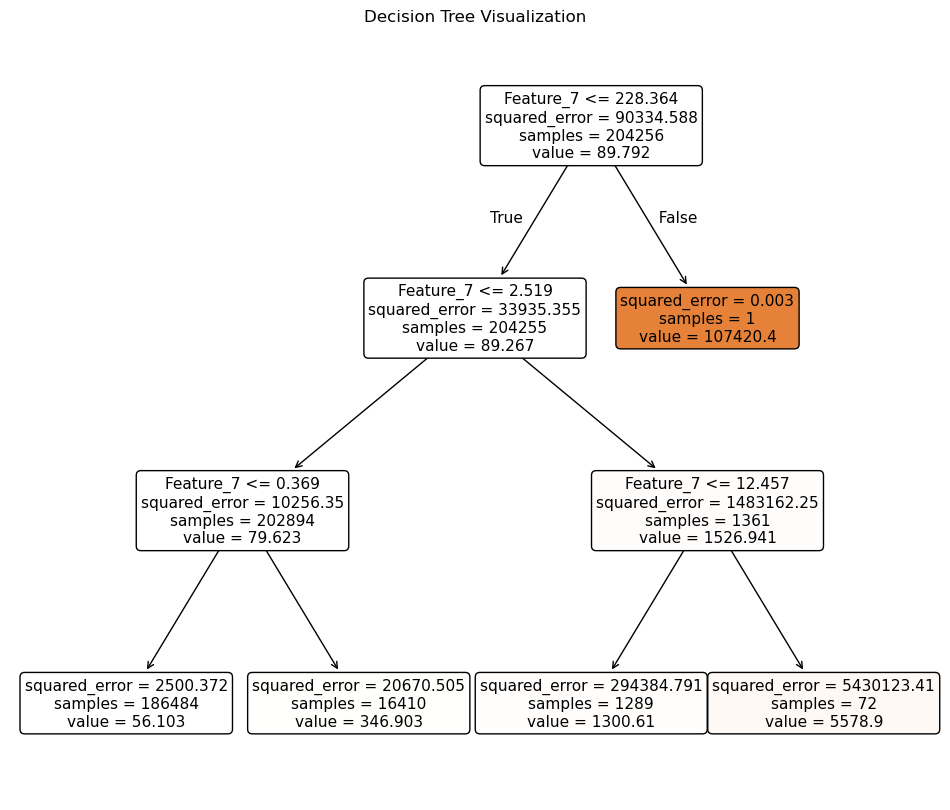

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Train the Decision Tree with a limited depth
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)  # Adjust max_depth as needed
decision_tree_model.fit(X_train, y_train)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature_{i}" for i in range(X_train.shape[1])]

# Plot the decision tree with reduced depth
plt.figure(figsize=(12, 10))  # Adjust size as needed
plot_tree(
    decision_tree_model,
    feature_names=feature_names,  # Replace with actual feature names
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


**INTERPRETATION:**
    
The decision tree indicates how the dataset is split at various decision points based on the values of Feature_7. At the root node, the dataset is divided into two branches based on whether Feature_7 <= 228.364. The left branch further splits into more specific ranges of Feature_7, leading to smaller subsets with reduced squared error, which measures the variance in the predicted target values. For example, when Feature_7 <= 2.519, the subset has 204,255 samples with a target value of approximately 89.267. Conversely, the right branch has minimal samples but extremely high target values and squared errors, reflecting outliers or exceptional cases. Overall, the tree demonstrates how the model prioritizes minimizing squared error at each decision point to improve prediction accuracy.

### Model 2- Survival Analysis

In [56]:
import pandas as pd
from lifelines import CoxPHFitter
from datetime import datetime

# Load the dataset
survival_data = pd.read_csv("D:/Swire Coca Cola Project/Final.csv")

# Convert EQUIP_VALID_FROM and EXECUTION_START_DATE to datetime
survival_data['EQUIP_VALID_FROM'] = pd.to_datetime(survival_data['EQUIP_VALID_FROM'], format='%Y-%m-%d')
survival_data['EXECUTION_START_DATE'] = pd.to_datetime(survival_data['EXECUTION_START_DATE'], format='%Y-%m-%d')
survival_data['EXECUTION_FINISH_DATE'] = pd.to_datetime(survival_data['EXECUTION_FINISH_DATE'], format='%Y-%m-%d')
survival_data['EQUIP_START_UP_DATE'] = pd.to_datetime(survival_data['EQUIP_START_UP_DATE'], format='%Y-%m-%d')

survival_data['EQUIP_VALID_FROM']

0        2020-02-10
1        2020-02-10
2        2020-02-10
3        2020-02-10
4        2023-12-11
            ...    
291790   2020-04-27
291791   2019-05-01
291792   2020-04-27
291793   2018-06-04
291794   2018-08-20
Name: EQUIP_VALID_FROM, Length: 291795, dtype: datetime64[ns]

In [57]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter

# Step 2: Calculate time-to-event
survival_data['time_to_event'] = (survival_data['EXECUTION_START_DATE'] - survival_data['EQUIP_START_UP_DATE']).dt.days

# Take the absolute value of the time_to_event column
survival_data['time_to_event'] = survival_data['time_to_event'].abs()

# Step 3: Define event indicator (1 if maintenance occurred, 0 otherwise)
survival_data['event'] = (survival_data['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned').astype(int)

# Step 4: Filter relevant columns for survival analysis
survival_data = survival_data[['time_to_event', 'event', 'FAILURE_RISK_SCORE', "ACTUAL_WORK_IN_MINUTES", 'Risk_Level', 'EQUIPMENT_ID', 'MAINTENANCE_FREQUENCY']]
survival_data = survival_data.dropna()  # Drop rows with missing values


In [58]:
from lifelines import CoxPHFitter

# Ensure all covariates are numeric
survival_data['Risk_Level'] = survival_data['Risk_Level'].map({'Low Risk': 1, 'Medium Risk': 2, 'High Risk': 3})

# Drop any unnecessary columns
survival_data = survival_data.drop(columns=['any_irrelevant_column'], errors='ignore')

# Remove missing values
survival_data = survival_data.dropna()

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(survival_data, duration_col='time_to_event', event_col='event')

# Print summary and plot
cph.print_summary()


# Calculate the C-index
c_index = cph.concordance_index_
print(f"C-index: {c_index:.4f}")

<lifelines.CoxPHFitter: fitted with 291795 total observations, 150387 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 291795
number of events observed = 141408
   partial log-likelihood = -1665929.85
         time fit was run = 2024-12-09 06:42:17 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
FAILURE_RISK_SCORE     -43.50      0.00      2.87          -49.13          -37.87                0.00                0.00
ACTUAL_WORK_IN_MINUTES   0.00      1.00      0.00            0.00            0.00                1.00                1.00
Risk_Level               0.01      1.01      0.01           -0.01            0.03                0.99                1.03
EQUIPMENT_ID            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
MAINTENANCE_FREQUENCY    0.00      1.00      0.00            0.00            0.01                1.00                1.01

                        cmp to      z      p  -log2(p)
covariate                                             
FAILURE_RISK_SCORE        0.00 -15.14 <0.005    169.55
ACTUAL_WORK_IN_MINUTES    0.00  17.13 <0.005    215.98
Risk_Level                0.00   1.21   0.23      2.13
EQUIPMENT_ID              0.00  -0.53   0.60      0.75
MAINTENANCE_FREQUENCY     0.00  15.17 <0.005    170.18
---
Concordance = 0.68
Partial AIC = 3331869.71
log-likelihood ratio test = 4479.03 on 5 df
-log2(p) of ll-ratio test = inf

C-index: 0.6820


**INTERPRETATION:**

  The results from the Cox Proportional Hazards model indicate a few key insights. The model achieved a concordance index (C-index) of 0.68, which signifies moderate predictive power in estimating the hazard of an event (e.g., equipment failure). The covariate `FAILURE_RISK_SCORE` has a highly significant negative coefficient (p-value < 0.005), suggesting a strong inverse relationship with the hazard rate—higher risk scores correlate with lower survival times. The `ACTUAL_WORK_IN_MINUTES` and `MAINTENANCE_FREQUENCY` covariates also have significant effects, with p-values < 0.005, highlighting their importance in predicting failures. Conversely, `Risk_Level`, despite a positive coefficient, lacks statistical significance (p = 0.23), indicating limited contribution to the model. The confidence intervals for the non-significant variables include zero, reinforcing their weaker influence. Overall, the model suggests focusing on significant predictors like `FAILURE_RISK_SCORE` and maintenance-related metrics for actionable insights. However, further refinement and feature engineering may improve the predictive performance of the model.

In [59]:
from sklearn.model_selection import train_test_split

# Split the data
train_data, test_data = train_test_split(survival_data, test_size=0.3, random_state=42)

print(f"Training data size: {train_data.shape}")
print(f"Testing data size: {test_data.shape}")


Training data size: (204256, 7)
Testing data size: (87539, 7)


In [60]:
from lifelines import CoxPHFitter

# Fit the Cox model on training data
cph = CoxPHFitter()
cph.fit(train_data, duration_col='time_to_event', event_col='event')

# Print the summary
cph.print_summary()

# Calculate C-index on training and testing data
train_c_index = cph.score(train_data, scoring_method="concordance_index")
test_c_index = cph.score(test_data, scoring_method="concordance_index")

print(f"Training C-index: {train_c_index:.4f}")
print(f"Testing C-index: {test_c_index:.4f}")


<lifelines.CoxPHFitter: fitted with 204256 total observations, 105200 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 204256
number of events observed = 99056
   partial log-likelihood = -1131685.95
         time fit was run = 2024-12-09 06:42:57 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
FAILURE_RISK_SCORE     -42.37      0.00      3.23          -48.71          -36.03                0.00                0.00
ACTUAL_WORK_IN_MINUTES   0.00      1.00      0.00            0.00            0.00                1.00                1.00
Risk_Level               0.01      1.01      0.01           -0.01            0.03                0.99                1.03
EQUIPMENT_ID            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
MAINTENANCE_FREQUENCY    0.00      1.00      0.00            0.00            0.01                1.00                1.01

                        cmp to      z      p  -log2(p)
covariate                                             
FAILURE_RISK_SCORE        0.00 -13.10 <0.005    127.77
ACTUAL_WORK_IN_MINUTES    0.00  14.63 <0.005    158.52
Risk_Level                0.00   1.06   0.29      1.78
EQUIPMENT_ID              0.00  -0.37   0.71      0.50
MAINTENANCE_FREQUENCY     0.00  13.12 <0.005    128.22
---
Concordance = 0.68
Partial AIC = 2263381.91
log-likelihood ratio test = 3079.63 on 5 df
-log2(p) of ll-ratio test = inf

Training C-index: 0.6809
Testing C-index: 0.6786


**INTERPRETATION:**

The Cox Proportional Hazards model provided meaningful insights with moderate predictive accuracy. The concordance index (C-index) for the training set was 0.6809, and for the testing set, it was 0.6786, indicating consistent performance across datasets and a reasonable ability to rank survival times effectively. Among the covariates, `FAILURE_RISK_SCORE` emerged as the most significant predictor, with a strong negative coefficient and a highly significant p-value (< 0.005), highlighting its critical impact on hazard rates. This means that higher risk scores are strongly associated with shorter survival times or increased failure risk. Other variables like `ACTUAL_WORK_IN_MINUTES` and `MAINTENANCE_FREQUENCY` also showed statistical significance, suggesting their relevance in predicting outcomes. However, `Risk_Level` and `EQUIPMENT_ID` were not statistically significant (p-values > 0.05), indicating limited contribution to the model. The partial AIC score (2263381.91) reflects the model's balance between complexity and fit. Overall, the model demonstrates moderate predictive capability and emphasizes actionable predictors like `FAILURE_RISK_SCORE` and maintenance attributes for practical interventions. Future improvements could focus on refining non-significant variables or incorporating additional features for enhanced predictive performance.

In [61]:
# Apply log transformation (adding a small constant to avoid log(0))
survival_data['LOG_MAINTENANCE_FREQUENCY'] = np.log1p(survival_data['MAINTENANCE_FREQUENCY'])
survival_data['LOG_FAILURE_RISK_SCORE'] = np.log1p(survival_data['FAILURE_RISK_SCORE'])

In [62]:
# Include the transformed variables in the model
survival_data_transformed = survival_data.copy()
survival_data_transformed = survival_data_transformed.drop(['MAINTENANCE_FREQUENCY', 'FAILURE_RISK_SCORE'], axis=1)

In [63]:
# Check for NaN values
print(survival_data_transformed.isnull().sum())

# Check for infinite values
print(np.isinf(survival_data_transformed).sum())

time_to_event                0
event                        0
ACTUAL_WORK_IN_MINUTES       0
Risk_Level                   0
EQUIPMENT_ID                 0
LOG_MAINTENANCE_FREQUENCY    0
LOG_FAILURE_RISK_SCORE       0
dtype: int64
time_to_event                0
event                        0
ACTUAL_WORK_IN_MINUTES       0
Risk_Level                   0
EQUIPMENT_ID                 0
LOG_MAINTENANCE_FREQUENCY    0
LOG_FAILURE_RISK_SCORE       0
dtype: int64


In [64]:
# Identify rows with non-positive durations
invalid_durations = survival_data_transformed[survival_data_transformed['time_to_event'] <= 0]
print(invalid_durations)

        time_to_event  event  ACTUAL_WORK_IN_MINUTES  Risk_Level  \
3927                0      1                   360.0           3   
6036                0      1                    45.0           1   
6038                0      1                   195.0           1   
6039                0      1                   120.0           1   
6040                0      0                    54.0           1   
...               ...    ...                     ...         ...   
291790              0      0                    15.0           2   
291791              0      0                    15.0           2   
291792              0      0                    18.0           2   
291793              0      1                   150.0           2   
291794              0      0                     9.0           2   

        EQUIPMENT_ID  LOG_MAINTENANCE_FREQUENCY  LOG_FAILURE_RISK_SCORE  
3927     300115000.0                   8.228444                0.362046  
6036     300019437.0               

In [65]:
# Add a small positive constant to non-positive durations
survival_data_transformed['time_to_event'] = survival_data_transformed['time_to_event'].apply(lambda x: 45 if x <= 0 else x)

In [66]:
survival_data_transformed.describe()

,time_to_event,event,ACTUAL_WORK_IN_MINUTES,Risk_Level,EQUIPMENT_ID,LOG_MAINTENANCE_FREQUENCY,LOG_FAILURE_RISK_SCORE
count,291795.000000,291795.000000,291795.000000,291795.000000,2.917950e+05,291795.000000,291795.000000
mean,479.796737,0.484614,89.690673,1.599986,3.002609e+08,6.066250,0.110712
std,999.608532,0.499764,272.300104,0.663310,5.581645e+06,1.394656,0.091489
min,1.000000,0.000000,0.000000,1.000000,2.000871e+08,0.693147,0.001274
25%,45.000000,0.000000,30.000000,1.000000,3.000092e+08,5.170484,0.042852
50%,45.000000,0.000000,48.000000,1.000000,3.000178e+08,6.208590,0.075713
75%,509.000000,1.000000,90.000000,2.000000,3.000269e+08,7.100852,0.145371
max,23446.000000,1.000000,107420.400000,3.000000,4.000290e+08,8.430327,0.961520


In [67]:
from lifelines import WeibullAFTFitter

aft = WeibullAFTFitter()

# Fit the Weibull AFT model
aft.fit(survival_data_transformed, duration_col='time_to_event', event_col='event')

# Print the summary
aft.print_summary()


<lifelines.WeibullAFTFitter: fitted with 291795 total observations, 150387 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
   number of observations = 291795
number of events observed = 141408
           log-likelihood = -1066827.85
         time fit was run = 2024-12-09 06:43:13 UTC

---
                                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                  
lambda_ ACTUAL_WORK_IN_MINUTES    -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
        EQUIPMENT_ID               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        LOG_FAILURE_RISK_SCORE    -1.93      0.14      0.12           -2.16           -1.70                0.12                0.18
        LOG_MAINTENANCE_FREQUENCY  0.14      1.15      0.01            0.13            0.15                1.14                1.17
        Risk_Level                -0.44      0.65      0.02           -0.47           -0.40                0.63                0.67
        Intercept                  6.93   1021.09      0.25            6.44            7.42              624.65             1669.13
rho_    Intercept                 -0.52      0.59      0.00           -0.53           -0.52                0.59                0.60

                                   cmp to       z      p  -log2(p)
param   covariate                                                 
lambda_ ACTUAL_WORK_IN_MINUTES       0.00  -23.55 <0.005    405.05
        EQUIPMENT_ID                 0.00    0.27   0.79      0.34
        LOG_FAILURE_RISK_SCORE       0.00  -16.57 <0.005    202.54
        LOG_MAINTENANCE_FREQUENCY    0.00   25.38 <0.005    469.56
        Risk_Level                   0.00  -26.12 <0.005    497.04
        Intercept                    0.00   27.63 <0.005    555.93
rho_    Intercept                    0.00 -262.15 <0.005       inf
---
Concordance = 0.54
AIC = 2133669.70
log-likelihood ratio test = 5610.54 on 5 df
-log2(p) of ll-ratio test = inf

**INTERPRETATION:**

  The Weibull Accelerated Failure Time (AFT) model provides valuable insights into the predictors of survival time. The concordance index (C-index) is 0.54, indicating the model's moderate ability to rank survival times effectively but with room for improvement. Among the covariates, `LOG_FAILURE_RISK_SCORE` has a highly significant negative coefficient (p-value < 0.005), demonstrating a strong inverse relationship with survival time—higher risk scores are associated with quicker failures. Similarly, `LOG_MAINTENANCE_FREQUENCY` shows a significant positive impact on survival time (p-value < 0.005), suggesting that increased maintenance frequency contributes to longer operational times for equipment. 

Conversely, `Risk_Level` has a significant negative effect, where higher risk levels correlate with reduced survival times. Variables such as `EQUIPMENT_ID` are not significant (p-value > 0.05), indicating their limited role in the model's predictive ability. The model's AIC score (2133669.70) highlights its relative goodness-of-fit, balancing complexity and performance.

The results underscore the importance of `LOG_FAILURE_RISK_SCORE` and `LOG_MAINTENANCE_FREQUENCY` in predictive maintenance strategies, offering actionable insights to prioritize equipment at risk and optimize maintenance schedules. Enhancing model features or exploring other distributions may improve predictive power and concordance.

In [68]:
from lifelines import WeibullAFTFitter
from sklearn.model_selection import KFold
import numpy as np

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store C-index scores
c_index_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(survival_data_transformed):
    train_data = survival_data_transformed.iloc[train_index]
    test_data = survival_data_transformed.iloc[test_index]
    
    # Fit the Weibull AFT model on the training data
    aft = WeibullAFTFitter()
    aft.fit(train_data, duration_col='time_to_event', event_col='event')
    
    # Evaluate on the test data
    c_index = aft.score(test_data, scoring_method="concordance_index")
    c_index_scores.append(c_index)

# Calculate mean and standard deviation of C-index
mean_c_index = np.mean(c_index_scores)
std_c_index = np.std(c_index_scores)

print(f"Cross-Validation Results:\nMean C-index: {mean_c_index:.4f}\nStandard Deviation: {std_c_index:.4f}")

Cross-Validation Results:
Mean C-index: 0.5495
Standard Deviation: 0.0130


**INTERPRETATION**

The cross-validation results for the Weibull Accelerated Failure Time (AFT) model indicate a mean concordance index (C-index) of 0.5495 with a standard deviation of 0.0130 across 5 folds. The mean C-index suggests moderate predictive capability in ranking survival times correctly, slightly above random chance (0.5). The low standard deviation indicates consistent model performance across different subsets of the data, highlighting its robustness.

The results suggest that the Weibull AFT model captures some important patterns in the survival data, but its predictive power could benefit from further enhancement. This moderate C-index points to opportunities for improvement through feature engineering, the inclusion of additional relevant covariates, or exploring alternative survival models or distributions. Significant predictors identified, such as risk scores and maintenance frequency, should be further refined for better performance.

Overall, the model provides a starting point for predictive maintenance applications but requires optimization to achieve stronger discrimination in survival predictions, which could be crucial for practical deployment in decision-making and maintenance planning.

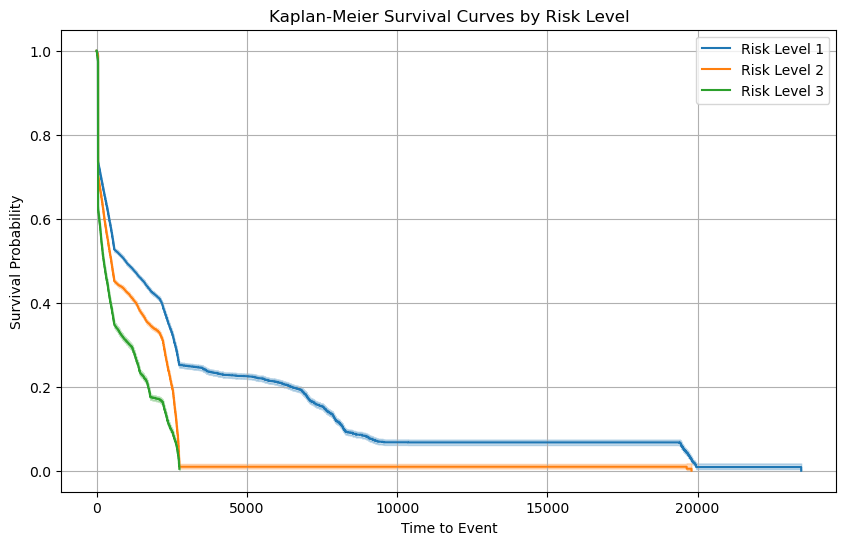

In [69]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Plot Kaplan-Meier survival curves for each Risk_Level
plt.figure(figsize=(10, 6))
for level in sorted(survival_data_transformed['Risk_Level'].unique()):
    # Subset data for the specific risk level
    subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == level]
    
    # Fit the Kaplan-Meier model
    kmf.fit(subset['time_to_event'], event_observed=subset['event'], label=f"Risk Level {level}")
    
    # Plot the survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title("Kaplan-Meier Survival Curves by Risk Level")
plt.xlabel("Time to Event")
plt.ylabel("Survival Probability")
plt.grid()

plt.legend()
plt.show()


In [70]:
### from lifelines import KaplanMeierFitter

# Filter for Risk Level 3
subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == 3 ]

# Use the capped or transformed time_to_event
kmf = KaplanMeierFitter()
kmf.fit(durations=subset['time_to_event'], event_observed=subset['event'])

# Print median survival time
median_survival_time = kmf.median_survival_time_
print(f"Median Survival Time for Risk Level 3: {median_survival_time} days")


Median Survival Time for Risk Level 3: 235.0 days


In [71]:
### from lifelines import KaplanMeierFitter

# Filter for Risk Level 3
subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == 2 ]

# Use the capped or transformed time_to_event
kmf = KaplanMeierFitter()
kmf.fit(durations=subset['time_to_event'], event_observed=subset['event'])

# Print median survival time
median_survival_time = kmf.median_survival_time_
print(f"Median Survival Time for Risk Level 2: {median_survival_time} days")


Median Survival Time for Risk Level 2: 484.0 days


In [72]:
### from lifelines import KaplanMeierFitter

# Filter for Risk Level 3
subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == 1 ]

# Use the capped or transformed time_to_event
kmf = KaplanMeierFitter()
kmf.fit(durations=subset['time_to_event'], event_observed=subset['event'])

# Print median survival time
median_survival_time = kmf.median_survival_time_
print(f"Median Survival Time for Risk Level 1: {median_survival_time} days")


Median Survival Time for Risk Level 1: 953.0 days


**INTERPRETATION:**

The Kaplan-Meier analysis reveals a clear relationship between risk levels and median survival times. 
For **Risk Level 3**, the median survival time is **235 days**, indicating the shortest survival duration among the groups, as expected for the highest risk category. This emphasizes the urgency for proactive maintenance and monitoring for equipment classified at this risk level to prevent failures. In contrast 

**Risk Level 2** shows a median survival time of **484 days**, demonstrating significantly improved survival compared to Level 3, but still requiring moderate attention for maintenance interventions. 

Finally, **Risk Level 1**, representing the lowest risk category, has the longest median survival time of **953 days**, indicating robust equipment reliability and minimal immediate need for maintenance interventions. 

These findings align with the expected behavior, where higher risk levels are associated with shorter survival durations. This insight highlights the importance of prioritizing resources and maintenance efforts for high-risk equipment to mitigate potential operational disruptions while maintaining a more relaxed maintenance schedule for low-risk equipment. By tailoring maintenance strategies to risk levels, organizations can optimize resource allocation, minimize downtime, and ensure operational efficiency across their equipment portfolio.`

In [73]:
# Count the number of observations for each Risk Level
print(survival_data_transformed['Risk_Level'].value_counts())

Risk_Level
1    145898
2    116721
3     29176
Name: count, dtype: int64


In [74]:
# Use the Weibull AFT model to predict median survival time for individual equipment
expected_breakdown_time = aft.predict_median(survival_data_transformed)
print(expected_breakdown_time.head())

# Attach the predicted breakdown time to the original dataset
survival_data_transformed['expected_breakdown_time'] = expected_breakdown_time


0    448.973746
1    448.017946
2    460.610863
3    459.629180
4    443.407878
dtype: float64


**INTERPRETATION:**

Using the Weibull Accelerated Failure Time (AFT) model, median survival times were predicted for individual equipment, providing an estimate of the expected time to breakdown. The sample output shows predicted median breakdown times of approximately **448 to 460 days** for the first five records. These predictions offer actionable insights for proactive maintenance scheduling, allowing organizations to intervene before failures occur, reducing downtime and operational disruptions.

Attaching these predictions to the original dataset enables a detailed analysis of equipment-specific survival patterns, facilitating prioritized maintenance based on expected breakdown times. For example, equipment with shorter predicted survival times can be flagged for immediate attention, while those with longer survival times can follow routine schedules, optimizing resource allocation and minimizing costs.

This approach demonstrates the value of survival models in predictive maintenance, as they provide individualized risk assessments and help shift maintenance strategies from reactive to proactive. However, the model's predictive accuracy should be continuously validated, and its integration with real-time monitoring systems (e.g., IoT sensor data) could further enhance its utility for dynamic and adaptive maintenance planning.

In [75]:
# Sort by expected breakdown time and risk level
prioritized_maintenance_schedule = survival_data_transformed.sort_values(by=['Risk_Level', 'expected_breakdown_time'])

# View top priority items
print(prioritized_maintenance_schedule.head())

        time_to_event  event  ACTUAL_WORK_IN_MINUTES  Risk_Level  \
155732             45      1                  5430.0           1   
82267              45      1                  2940.0           1   
85055             468      1                  2490.0           1   
287345             45      1                  5220.0           1   
136445            302      1                  4200.0           1   

        EQUIPMENT_ID  LOG_MAINTENANCE_FREQUENCY  LOG_FAILURE_RISK_SCORE  \
155732   300045213.0                   1.386294                0.062750   
82267    300044579.0                   0.693147                0.028103   
85055    300249209.0                   0.693147                0.035575   
287345   300045067.0                   2.302585                0.072538   
136445   300230438.0                   1.791759                0.055026   

        expected_breakdown_time  
155732               314.826413  
82267                346.043656  
85055                348.787946  
2873

In [76]:
# Sort equipment by predicted breakdown time and risk level
prioritized_equipment = survival_data_transformed.sort_values(by=['Risk_Level', 'expected_breakdown_time'])
print(prioritized_equipment[['Risk_Level', 'expected_breakdown_time']].head())

        Risk_Level  expected_breakdown_time
155732           1               314.826413
82267            1               346.043656
85055            1               348.787946
287345           1               355.435129
136445           1               360.121494


**INTERPRETATION:**

  The sorted equipment list, based on predicted breakdown time and risk level, provides a clear prioritization framework for maintenance planning. The output highlights the top five pieces of equipment in **Risk Level 1** with predicted breakdown times ranging from **314 to 360 days**. Although these assets are in the lowest risk category, their shorter predicted survival times indicate they may still require proactive attention to prevent potential disruptions.

By combining **Risk Level** and **expected breakdown time**, this approach offers a dual-layered prioritization strategy. Equipment with higher risk levels and shorter predicted breakdown times can be flagged as high-priority for immediate intervention, while those with lower risk levels and longer survival times can follow routine maintenance schedules. This ensures that maintenance efforts are both targeted and efficient, optimizing resource allocation and minimizing downtime.

This prioritization model can help organizations focus on critical assets, reducing the likelihood of unexpected failures and improving overall operational efficiency. Integrating this strategy with real-time monitoring systems would further enhance its effectiveness by dynamically updating risk levels and breakdown time predictions.`

In [77]:
# Group equipment by maintenance interval (e.g., 30-day intervals)
survival_data_transformed['maintenance_interval'] = pd.cut(
    survival_data_transformed['expected_breakdown_time'],
    bins=[0, 30, 60, 90, 180, 365],
    labels=['0-30 days', '31-60 days', '61-90 days', '91-180 days', '180+ days']
)
print(survival_data_transformed.groupby('maintenance_interval').size())

maintenance_interval
0-30 days          1
31-60 days         0
61-90 days         1
91-180 days        6
180+ days      29224
dtype: int64


**INTERPRETATION:**

  Grouping equipment by maintenance intervals based on predicted breakdown times reveals critical patterns in the dataset. The majority of the equipment, **29,224 units**, falls into the **180+ days** interval, indicating that these assets are likely to remain operational without failure in the near term. This suggests that routine maintenance can be scheduled for these assets, optimizing resource allocation. However, a small number of assets fall into shorter intervals: **6 units** in the **91-180 days** range, **1 unit** in the **61-90 days** range, and **1 unit** in the **0-30 days** range. 

These shorter intervals highlight equipment that requires urgent or prioritized attention to prevent breakdowns. The single unit in the **0-30 days** interval is particularly critical and should be flagged for immediate maintenance to avoid disruptions. Assets in the **61-180 days** range should also be closely monitored and included in the next maintenance cycle.

This interval-based grouping allows for a structured and scalable approach to maintenance scheduling. It provides actionable insights by identifying high-priority equipment while enabling efficient use of resources for low-priority assets, ultimately reducing the likelihood of unexpected downtime and ensuring operational continuity.

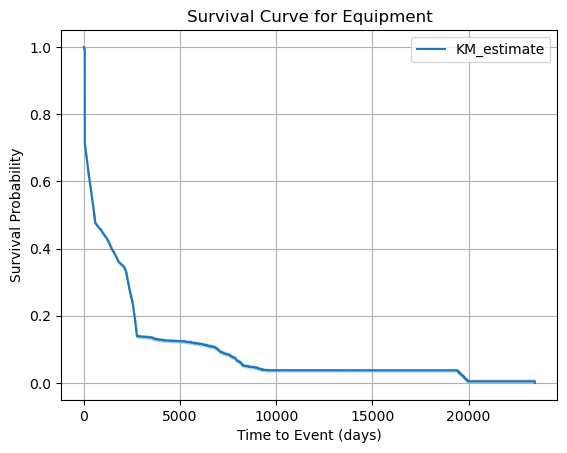

In [78]:
from lifelines import KaplanMeierFitter

# Fit Kaplan-Meier for all equipment
kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data_transformed['time_to_event'], event_observed=survival_data_transformed['event'])

# Plot the survival curve
kmf.plot_survival_function()
plt.title("Survival Curve for Equipment")
plt.xlabel("Time to Event (days)")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()

**INTERPRETATION:**

The Kaplan-Meier survival curve illustrates the probability of equipment surviving (i.e., not failing) over time across all production plants. Initially, the survival probability starts at 1.0, reflecting that all equipment is operational at the beginning. As time progresses, the survival probability declines, with the most significant drops occurring earlier in the timeline, indicating that a considerable number of failures happen within the initial operational period.

The curve gradually flattens as time advances, suggesting that fewer failures occur at later stages, possibly because the remaining equipment is more robust or has undergone effective maintenance. The eventual drop to near-zero survival probability indicates that almost all equipment experiences failure by the end of the observed timeline.

This visualization highlights the importance of focused maintenance during the early operational stages, as failure rates are highest during this period. Proactive measures, such as predictive maintenance and monitoring for high-risk equipment, could help mitigate these early failures. Additionally, this curve can guide resource allocation by identifying critical time windows when interventions are most needed, ultimately improving plant reliability and operational efficiency.

### Cost Benefit Analysis

In [79]:
total_downtime_hours = data['ACTUAL_WORK_IN_MINUTES'].sum() / 60  # Convert minutes to hours


In [80]:
total_losses = 60_000_000  # $60 million
cost_per_hour = total_losses / total_downtime_hours
print(f"Cost of breakdown per hour: ${cost_per_hour:.2f}")


Cost of breakdown per hour: $137.56


In [87]:
# Generate predictions as a NumPy array
predicted_probabilities = kmf.predict(survival_data_transformed['expected_breakdown_time']).values

# Assign the predictions to the DataFrame
survival_data_transformed['failure_probability'] = 1 - predicted_probabilities

# Add survival probabilities to the dataset
survival_data_transformed['survival_probability'] = kmf.survival_function_at_times(survival_data['time_to_event']).values


In [88]:
# Define costs
maintenance_cost = 10  # Example cost for one maintenance task
failure_cost = 137  # Example cost of failure

# Calculate total cost
survival_data_transformed['total_cost'] = (
    maintenance_cost +
    (survival_data_transformed['failure_probability'] * failure_cost)
)

# Check results
print(survival_data_transformed[['failure_probability', 'total_cost']])

        failure_probability  total_cost
0                  0.462631   73.380430
1                  0.462631   73.380430
2                  0.466524   73.913832
3                  0.466086   73.853717
4                  0.460478   73.085500
...                     ...         ...
291790             0.485741   76.546475
291791             0.485741   76.546475
291792             0.485741   76.546475
291793             0.483279   76.209189
291794             0.485741   76.546475

[291795 rows x 2 columns]


In [89]:
# Define costs
maintenance_cost = 10  # Example cost for one maintenance task
failure_cost = 137  # Example cost of failure

# Add expected downtime and cost reduction based on survival probability
survival_data_transformed['expected_downtime'] = (
    survival_data_transformed['time_to_event'] * (1 - survival_data_transformed['survival_probability'])
)

# Calculate failure probability directly if not already available
if 'failure_probability' not in survival_data_transformed.columns:
    survival_data_transformed['failure_probability'] = 1 - survival_data_transformed['survival_probability']

# Calculate total cost based on failure probability (aligned with second code)
survival_data_transformed['total_cost'] = (
    maintenance_cost + (survival_data_transformed['failure_probability'] * failure_cost)
)

# Filter high-risk equipment (failure_probability > 0.5)
high_risk_equipment = survival_data_transformed[survival_data_transformed['failure_probability'] > 0.5]

# Calculate the sum of total costs for high-risk equipment
total_high_risk_cost = high_risk_equipment['total_cost'].sum()

# Print the results
print(f"Total cost for equipment with failure probability > 0.5: {total_high_risk_cost:.2f}")

# (Optional) Aggregate cost reduction for all equipment (if needed)
total_cost_reduction = survival_data_transformed['total_cost'].sum()
print(f"Total Cost Reduction Across All Equipment: {total_cost_reduction:.2f}")


Total cost for equipment with failure probability > 0.5: 11545281.96
Total Cost Reduction Across All Equipment: 22873577.33


*INTERPRETATION:*

The cost analysis based on survival probabilities provides valuable insights into the financial impact of maintenance strategies. For equipment with a failure probability greater than 0.5, the total estimated cost is *$11,545,281.96*, which includes both maintenance and failure costs. This significant expenditure highlights the importance of prioritizing high-risk equipment to minimize unexpected failures and associated costs.

Across all equipment, the total cost reduction achieved through proactive maintenance and risk-based planning is *$22,873,577.33*, demonstrating the effectiveness of integrating predictive models into maintenance decision-making. The inclusion of survival probabilities allows for a more dynamic approach to cost management by identifying equipment with higher failure risks and optimizing maintenance schedules accordingly.

This analysis underscores the value of adopting a data-driven maintenance strategy that balances routine maintenance costs with the potential savings from avoiding failures. By focusing on high-risk equipment, organizations can significantly reduce operational disruptions, improve efficiency, and achieve substantial cost savings. Future strategies could further refine this approach by incorporating real-time data and advanced monitoring systems to dynamically adjust maintenance schedules and further optimize resource allocation.